In [29]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-29-cf141d2e4c3c>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [30]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [31]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [32]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [33]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##

#Q1 - Complete the ‘get histogram’ function provided to plot a histogram of the
#     ratings in “hotelDf”. Ensure you label your axes and title the plot. Use
#     the default parameters for bin size.

    # creating a figure with said figsize and setting a title
    fig = plt.figure(figsize = figsize)
    plt.title("Hotel Ratings")

    # creates a list of all values in the rating score column and creates a
    # histogram from it
    plt.hist(hotelDf['ratingScore'].values)

    plt.xlabel("Rating score")
    plt.ylabel("Frequency")
    ## end ##

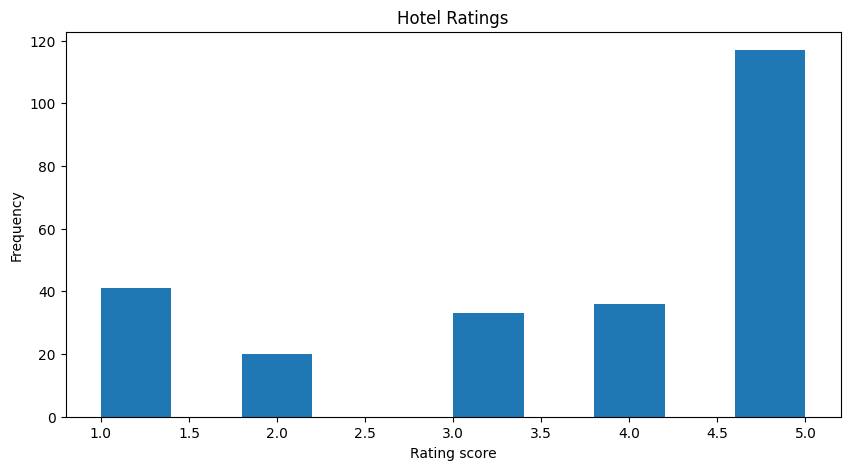

In [34]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [35]:
def plot_time_series(df: pd.DataFrame) -> None:
  ## Your code starts here ##

# Q2 - Complete the ‘plot time series’ function to plot the number of reviews
#      and rolling average rating score for 3 hotels over time. Plot these on
#      separate axes, as shown in the lab. The 3 hotels you should use are
#      provided in the Jupyter notebook. You should use a rolling average over
#      the last 5 rating scores.

  # creating a figure with 2 subplots sharing the same x axis
  fig, ax = plt.subplots(2,1,figsize = (15,7), sharex = True)

  # get average ratings for each of the 3 hotels
  def avg_rating_per_hotel(df):
    tempDf = df[['hotelName','ratingScore','reviewColumn']]
    tempDf.columns = ['hotelName', 'AverageRatingScore','n_reviews']
    tempDf = tempDf.groupby('hotelName').agg({'AverageRatingScore':'mean',
                                             'n_reviews':'count'})
    return tempDf
  avg_rating_df = avg_rating_per_hotel(df).index.values

  # do time series of avg rating for each hotel
  for hotel in avg_rating_df[:3]:
    _df = hotelDf[hotelDf['hotelName']==hotel].set_index('date_stamp')
    _df.index = pd.to_datetime(_df.index)
    _df = _df.sort_index()
    _df['count'] = 1
    _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
    _df['ratingScore'].rolling(5).mean().plot(ax=ax[1],label=hotel)# averages
    # first 5 points together

  ax[1].set_ylabel('Avg Rating')
  ax[1].set_title("Rolling Average time series")
  ax[0].set_ylabel('Number of Reviews')
  ax[0].set_title("Normal time series ")

  plt.legend()

  ## end ##

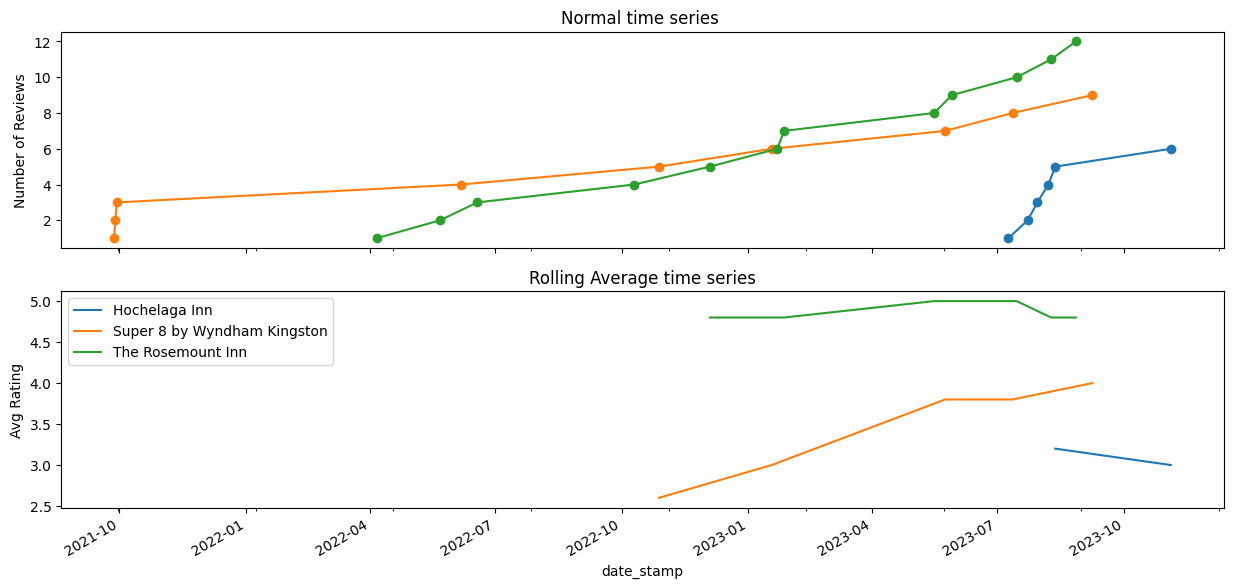

In [36]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [37]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##

  # Q3a - Complete the ‘most frequent words’ function to find the most common
#         500 words across all tokens in the dataset. You should return a list
#         sorted in descending order by frequency. The words returned should be
#         all in lowercase, with no stop words and have at least 3 characters.
#         You should use NLTK’s ‘word tokenize’ function to extract the tokens.
#         Print the top 10 most frequent words.

  # initializing stop word and counter variables
  stop = get_stop_words()
  counter = Counter()

  # getting a list of all reviews
  reviews = df['reviewColumn'].values

  # go through each review and count occurences of each word
  for review in reviews:
    counter.update([word.lower() for word in word_tokenize(review)
                        if word.lower() not in stop and len(word) > 2])

  # get topk most frequent words
  topk = counter.most_common(kwords)
  ## end ##
  return topk

In [38]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [39]:
## Your code starts here ##

# Q3b - Calculate the MI score of the top 500 most common words across all
#       lowercase tokens in the dataset. Print a DataFrame showing the 5 words
#       with the highest MI scores and their MI scores.

# build a dataframe with one-hot encoding for topk words in each review
def dataFrameTransformation(hotelDf, topk):
    reviews = hotelDf['reviewColumn'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)

    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finaldf = hotelDf[['hotelName','groundTruth']].join(freqReviewDf)
    return finaldf

hoteldf_transformed = dataFrameTransformation(hotelDf,topk)

# get MI score of topk words for a specific label column
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column],
                                                            df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

# get a df for topk words and their MI score and display top 5 MI scores
MI_df = getMI(topk,hoteldf_transformed)
MI_df.head(5)
## end ##

,Word,MI Score
3,great,0.070770
99,dirty,0.066292
11,n't,0.051020
0,clean,0.047330
42,floor,0.041603


## (c)

In [40]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##

  # Q3c - Calculate the PMI for the words “great” and “dirty” across positive
#         and negative sentiments and for the case that the word is present and
#         not present. You should print 2 DataFrames summarizing the PMI results
#         , similar to the ones in the lab.

# creating a function that calculates pmi for a word for positive and negative
# sentiments

  pmilist=[]
  N = df.shape[0]
  for sentiment in ['positive','negative']:
    for word_present in [False,True]:
        px = sum(df['groundTruth']==sentiment)
        py = sum(df[word]==word_present)
        pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

        if pxy==0:#Log 0 cannot happen
            pmi = math.log((pxy+0.0001)*N/(px*py))
        else:
            pmi = math.log(pxy*N/(px*py))

        pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

  # assemble the results into a dataframe
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']

  ## end ##
  return pmidf

In [41]:
# calc_pmi for "great"
calc_pmi(hoteldf_transformed,'great')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,187,98,-0.167191
1,positive,True,153,60,55,0.391939
2,negative,False,94,187,89,0.223621
3,negative,True,94,60,5,-1.518813


In [42]:
# calc_pmi for "dirty"
calc_pmi(hoteldf_transformed,'dirty')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

In [43]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [44]:
#  Q3d - Create a DataFrame with the top 50 most common noun phrases across the
#        reviews. Use the same grammar as in Lab 5. Print the top 10 most common
#        noun phrases with their frequencies.

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [45]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##

  # initialize a counter instance
  counter = Counter()
  # create a list of all reviews
  reviews = df['reviewColumn'].values

  # for each review, count occurences of same noun phrases
  for review in reviews:
          counter.update(flatten_phrase_lists([word
                          for word
                          in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                          ]))
  # collects most frequent noun phrases
  topk = counter.most_common(kNPs)

  ## end ##
  return topk

In [46]:
# Print top 10 most common noun phrases
top10_phrase = getTopKNP(hotelDf,10)
top10_phrase[:10]

[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

## (e)

In [47]:
## Your code starts here ##

# Q3e - Using only the hotels with at least 15 reviews, find the average rating
#       for each of these hotels. Print the hotel and average rating of the hotel
#       with the highest average rating and lowest average rating. Using only
#       the reviews for each hotel (ignore reviews of all other hotels),determine
#       the 5 noun phrases with the highest PMI for positive and negative sentiments
#       separately. Do this for both the highest rated and lowest rated hotels.
#       In total, you should print 4 DataFrames with 5 rows each and 2 columns
#       (the noun phrase and PMI), plus a header row (PMI for positive and
#       negative sentiment for each of the 2 hotels).

# extract list of all hotels with atleast 15 reviews
hotelNames = hotelDf[hotelDf['numReviews']> 14 ]['hotelName'].unique()

# create dataframe with hotels with atleast 15 reviews
hotels_15 = hotelDf[hotelDf['hotelName'].isin(hotelNames)]

# find avg rating of each hotel
def avg_rating_per_hotel(df):
  # average the scores over all hotels
  tempDf = df[['hotelName','ratingScore']]
  tempDf.columns = ['hotelName', 'AverageRatingScore']
  tempDf = tempDf.groupby('hotelName').agg({'AverageRatingScore':'mean'})
  return tempDf


# get avg rating of each hotel with 15+ reviews
avg_rating_df = avg_rating_per_hotel(hotels_15).sort_values(by =
                                        "AverageRatingScore", ascending = False)
display(avg_rating_df.head(1))
display(avg_rating_df.tail(1))

# calculating pmis of all words in a df for positive or negative sentiment

def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmi dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):

    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

# build a dataframe with one-hot encoding for topk noun phrases in each review
def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    # Instantiate an instance to access SentimentIntensityAnalyzer class
    # from vader in nltk
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print("\n" + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

reviews = hotelDf['reviewColumn'].values
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDF = pd.concat([reviewDF, hotelDf[['ratingScore']]], axis=1)
## end ##

,AverageRatingScore
hotelName,
Residence Inn by Marriott Kingston Water&#39;s Edge,4.782609


,AverageRatingScore
hotelName,
Bayside Inn &amp; Waterfront Suites,2.65625


100%|██████████| 247/247 [00:00<00:00, 828.56it/s]


In [48]:
# Top Hotel Positive PMI

# get top 50 noun phrases
topNP = getTopKNP(hotelDf,50)

# top hotel reviews
df_top_hotel = hotels_15[hotels_15['hotelName'] ==
                'Residence Inn by Marriott Kingston Water&#39;s Edge']

# getting df for top rated hotel
top_hotel = NPdataFrameTransformation(df_top_hotel,reviewDF,topNP)

#calculate pmi of all noun phrases from best rated hotel reviews with positive
#sentiment
pmi_TOP_POS = pmiForAllCal(top_hotel,topNP,'positive')
pmi_TOP_POS.sort_values('pmi', ascending = 0).head(5)


100%|██████████| 50/50 [00:00<00:00, 1092.73it/s]


,pmi
great view,0.044452
custom servic,0.044452
hockey tournament,0.044452
resid inn,0.044452
comfort bed,0.044452


In [49]:
# Top Hotel Negative PMI
pmi_TOP_POS = pmiForAllCal(top_hotel,topNP,'negative')
pmi_TOP_POS.sort_values('pmi', ascending = 0).head(5)

100%|██████████| 50/50 [00:00<00:00, 1107.92it/s]


,pmi
air condit,3.135494
next morn,3.135494
next time,2.442347
front desk,2.036882
custom servic,-6.074846


In [50]:
# Bottom Hotel Positive PMI

# get top 50 noun phrases
topNP = getTopKNP(hotelDf,50)

# bottom hotel reviews
df_bottom_hotel = hotels_15[hotels_15['hotelName'] ==
                'Bayside Inn &amp; Waterfront Suites']

# getting df for top rated hotel
bottom_hotel = NPdataFrameTransformation(df_bottom_hotel,reviewDF,topNP)

#calculate pmi of all noun phrases from best rated hotel reviews with positive
#sentiment
pmi_TOP_POS = pmiForAllCal(bottom_hotel,topNP,'positive')
pmi_TOP_POS.sort_values('pmi', ascending = 0).head(5)

100%|██████████| 50/50 [00:00<00:00, 743.67it/s]


,pmi
great view,1.163151
great locat,1.163151
reason price,1.163151
nice bathroom,1.163151
downtown kingston,1.163151


In [51]:
# Bottom Hotel Negative PMI
pmi_TOP_POS = pmiForAllCal(bottom_hotel,topNP,'negative')
pmi_TOP_POS.sort_values('pmi', ascending = 0).head(5)

100%|██████████| 50/50 [00:00<00:00, 708.72it/s]


,pmi
good locat,0.374693
park lot,0.374693
credit card,0.374693
next day,0.374693
king bed,0.374693


# Q4

## (a)

In [52]:
# Write the grammar RegEx for a noun phrase (named NP) that may or may not start
# with a determiner (DT tag), followed by any number of adjectives (including
# comparative and superlative adjectives using JJ, JJS, or JJR tags) or possibly
# none, followed by at least 1 singular or plural noun (NN or NNS tags).

grammar = r"""
    NP:
        {<DT>?<JJ|JJS|JJR>*<NN|NNS>+} # ? -> DT is optional, | -> or, * -> any
                                    # number of
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

In [53]:
## Your code starts here ##
# 4b - Calculate the PMI of each of the top 50 most common noun phrases with the
#      positive sentiment. Print a DataFrame showing the 5 noun phrases with the
#      highest PMI with positive sentiment. Repeat the same for negative
#      sentiment.


# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList


# get top50 most common noun phrases
def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                            ]))
    topk = counter.most_common(kNPs)
    return topk

top50_NP = getTopKNP(hotelDf,50)


# Creating appropriate Dataframe transformation
df = NPdataFrameTransformation(hotelDf,reviewDF,top50_NP)

## end ##

In [54]:
# Positive PMI
pmi_Pos = pmiForAllCal(df,top50_NP,'positive')
pmi_Pos.sort_values('pmi', ascending = 0).head(5)

100%|██████████| 50/50 [00:00<00:00, 1091.69it/s]


,pmi
reason price,0.47895
super clean,0.47895
water slide,0.47895
great experi,0.47895
great place,0.47895


In [55]:
# Negative PMI
pmi_Neg = pmiForAllCal(df,top50_NP,'negative')
pmi_Neg.sort_values('pmi', ascending = 0).head(5)

100%|██████████| 50/50 [00:00<00:00, 791.29it/s]


,pmi
good size,0.966094
bathroom door,0.966094
good choic,0.966094
air condition,0.966094
reward number,0.966094


## (c)

Answer: Referencing the Negative PMI table, people may dislike the fact that hotels in Kingston have rooms that lack air conditioning and bathroom doors.


